# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

## Columns 

•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

### Predict : Can you accurately predict insurance costs?

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm, trange

import lazypredict
from lazypredict.Supervised import LazyRegressor

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

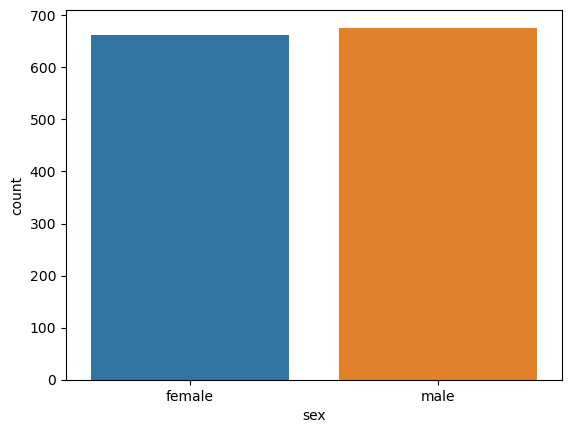

In [14]:
sns.countplot(x='sex', data=df)

evenly distributed

<Axes: xlabel='smoker', ylabel='count'>

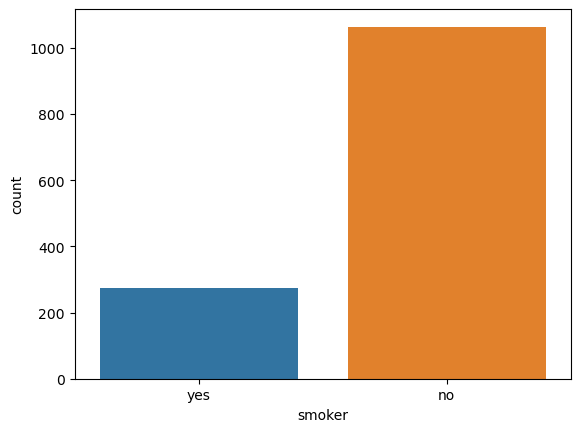

In [15]:
sns.countplot(x='smoker', data=df)

heavily weighted to the No column, will determine later if this needs to be balanced

<Axes: xlabel='region', ylabel='count'>

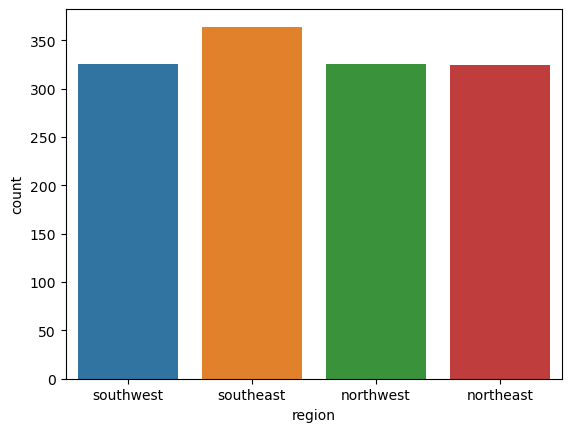

In [16]:
sns.countplot(x='region', data=df)

more or less evenly distributed

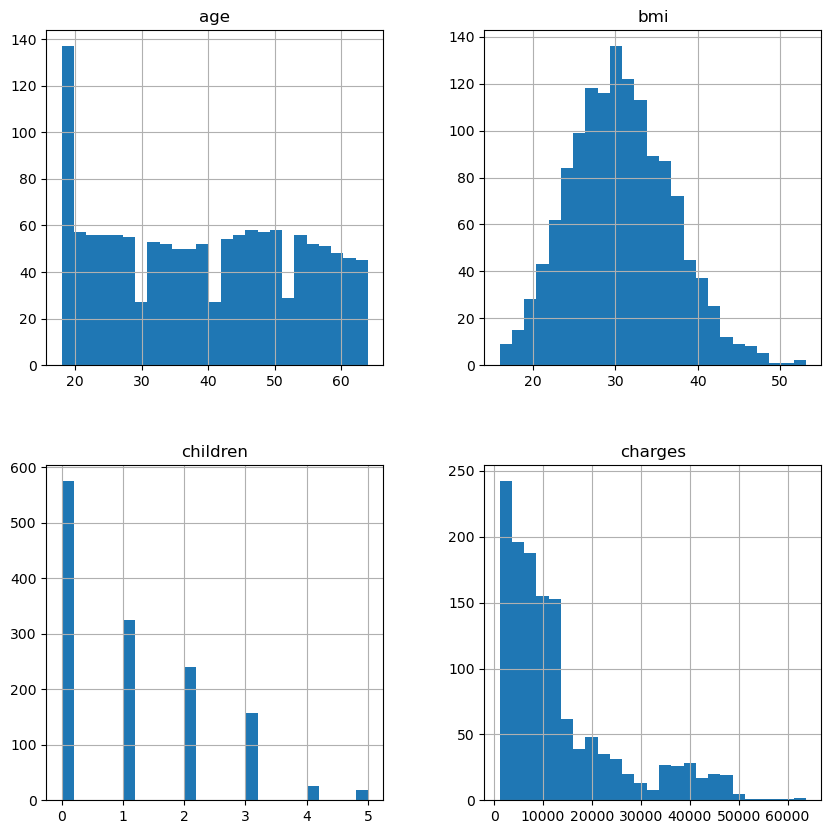

In [11]:
df.hist(bins=25,figsize=(10,10));

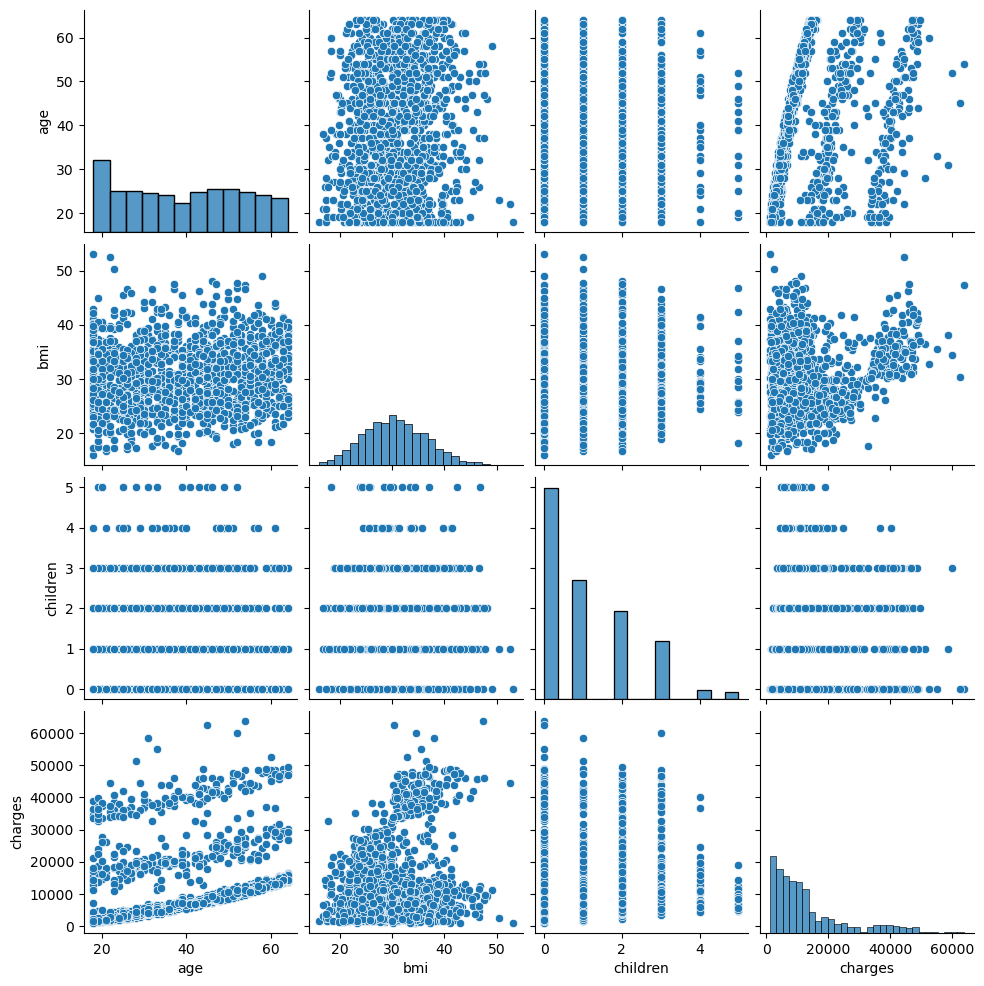

In [26]:
sns.pairplot(df, palette="Dark2");

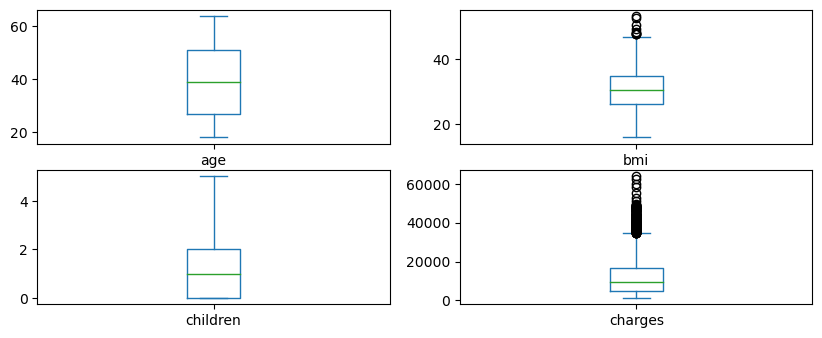

In [9]:
df.plot(kind='box',subplots=True,layout=(4,2),figsize=(10,8));

In [31]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.00,27.90,0,1.00,3.00,16884.92
1,18,1.00,33.77,1,0.00,2.00,1725.55
2,28,1.00,33.00,3,0.00,2.00,4449.46
3,33,1.00,22.70,0,0.00,1.00,21984.47
4,32,1.00,28.88,0,0.00,1.00,3866.86
...,...,...,...,...,...,...,...
1333,50,1.00,30.97,3,0.00,1.00,10600.55
1334,18,0.00,31.92,0,0.00,0.00,2205.98
1335,18,0.00,36.85,0,0.00,2.00,1629.83
1336,21,0.00,25.80,0,0.00,3.00,2007.94


<Axes: >

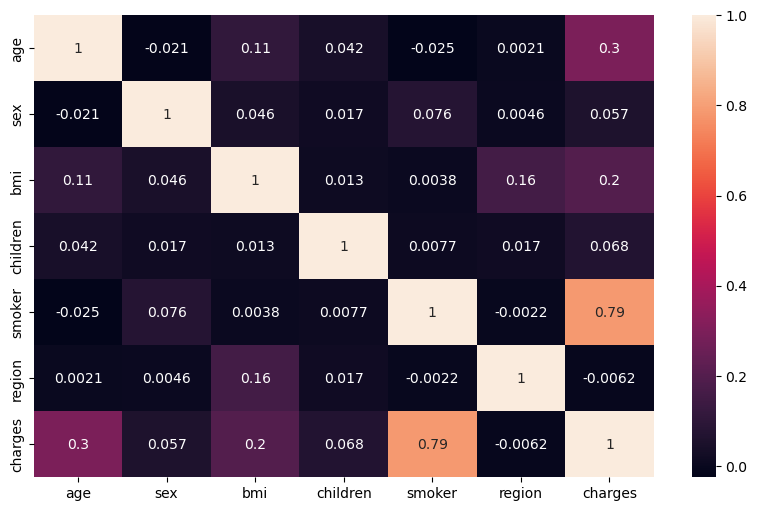

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

There is no significant correlation between features.

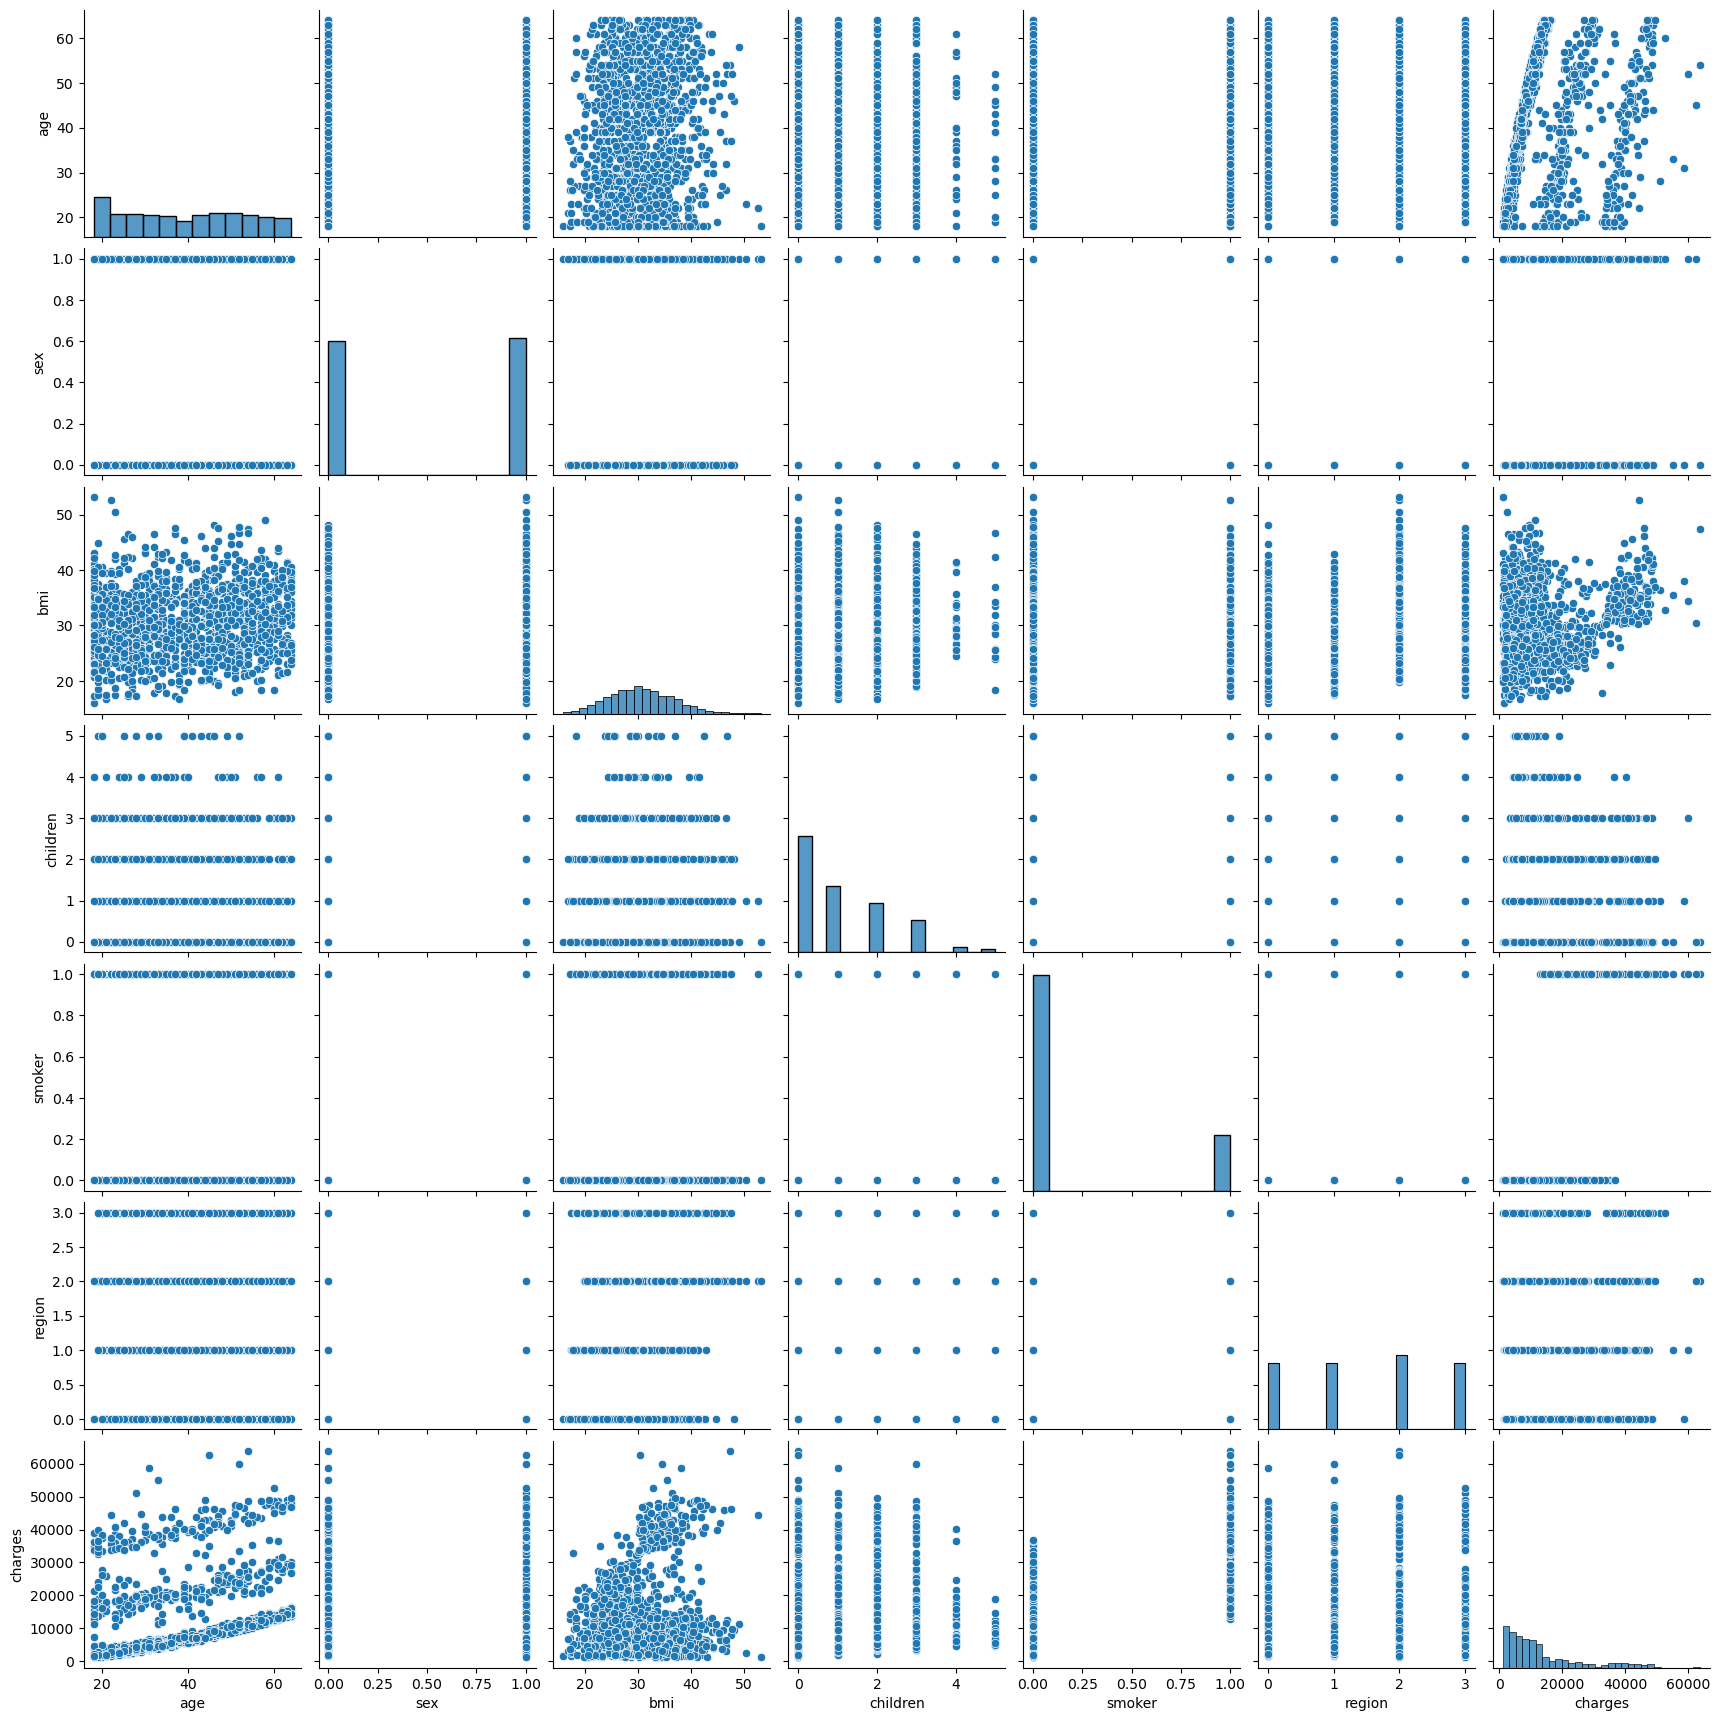

In [33]:
sns.pairplot(df);

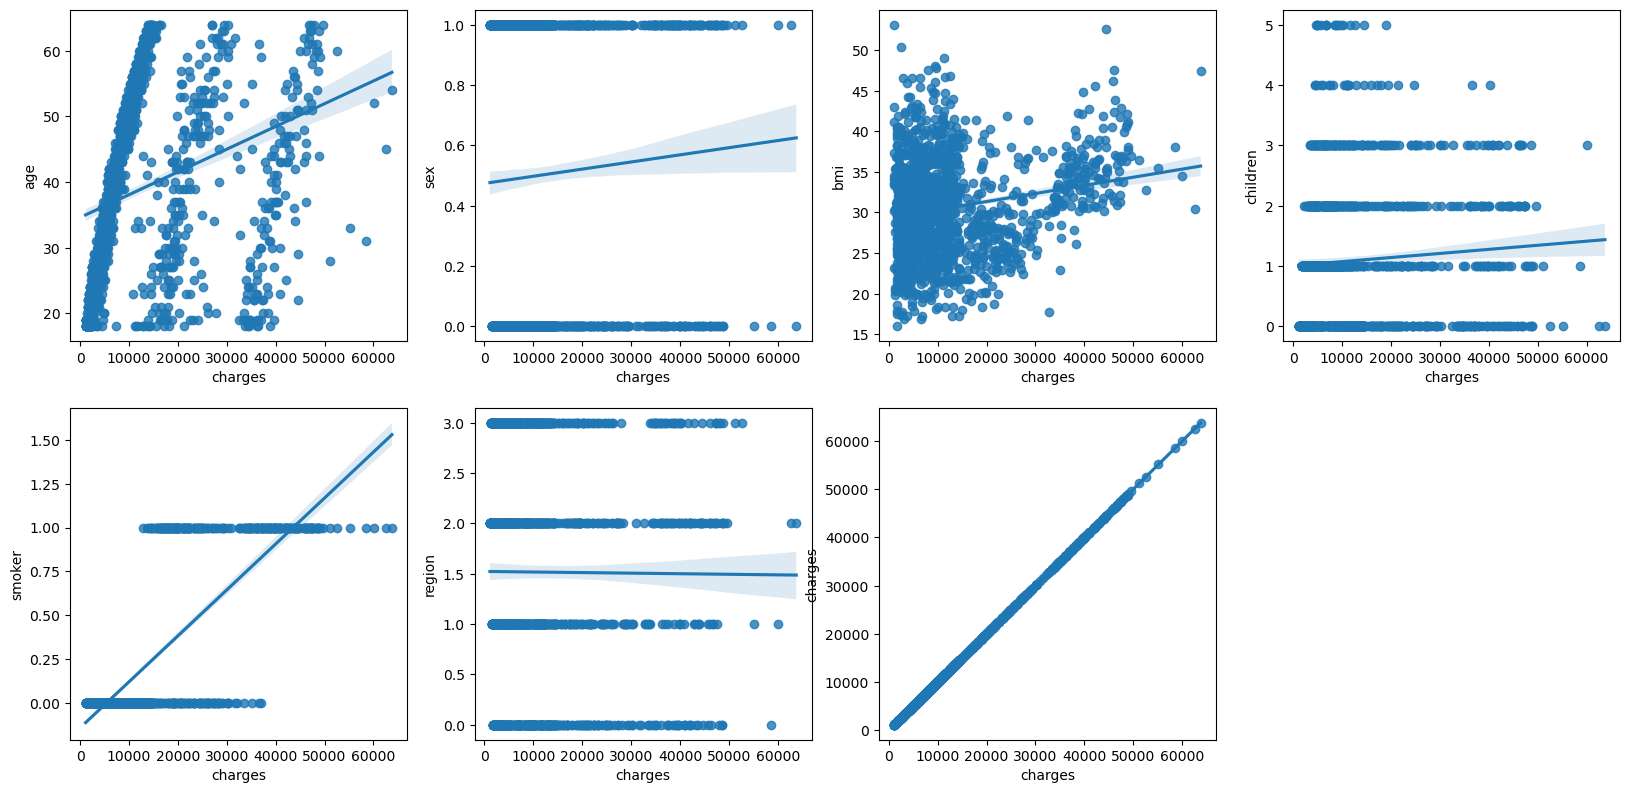

In [36]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=11:
        plt.subplot(5,4,p)
        sns.regplot(x='charges', y=i, data=df)
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
plt.show()

In [38]:
df_skew = df.skew()
df_skew

age         0.06
sex        -0.02
bmi         0.28
children    0.94
smoker      1.46
region     -0.04
charges     1.52
dtype: float64

In [39]:
# Removing skewness using cuberoot
for index, value in df_skew.iteritems():
    if value > 0.5:
        df[index] = np.cbrt(df[index])
df.skew()

age         0.06
sex        -0.02
bmi         0.28
children   -0.10
smoker      1.46
region     -0.04
charges     0.52
dtype: float64

In [44]:
x = df.drop(['charges'], axis=1)
y = df[['charges']]

In [45]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.02,age
1,1.01,sex
2,1.04,bmi
3,1.00,children
4,1.01,smoker
5,1.03,region


In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

In [51]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(reg_models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:11<00:00,  3.57it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 6
[LightGBM] [Info] Start training from score 21.772010
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.82       0.83   2.80   
LGBMRegressor                                0.81       0.81   2.89   
HistGradientBoostingRegressor                0.80       0.81   2.93   
RandomForestRegressor                        0.80       0.80   2.98   
NuSVR                                        0.80       0.80   2.99   
SVR                                          0.80       0.80   3.00   
AdaBoostRegressor                            0.79       0.79   3.06   
KNeighborsRegresso

In [63]:
gb_clf = GradientBoostingRegressor(random_state=39)

<IPython.core.display.Javascript object>

In [64]:
gb_clf.fit(xtrain,ytrain)

GradientBoostingRegressor(random_state=39)

In [65]:
ypred = gb_clf.predict(xtest)

In [66]:
r2_score(ytest,ypred)

0.8249993540663679

In [67]:
gb_clf.score(xtrain,ytrain)

0.8927956889870348

In [68]:
err = [mean_squared_error(ytest,ypred) for ypred in gb_clf.staged_predict(xtest)]

In [71]:
bst_est = np.argmin(err)

In [79]:
Final_model = GradientBoostingRegressor(n_estimators=bst_est,max_depth=3)

<IPython.core.display.Javascript object>

In [80]:
Final_model.fit(xtrain,ytrain)

GradientBoostingRegressor(n_estimators=42)

In [81]:
Final_model.score(xtest,ytest)

0.8343949158874218